<a href="https://colab.research.google.com/github/VolkhinD/Animals/blob/main/credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Credit Score Prediction using Bank Account Data***

***Description:***

In this machine learning project, the goal is to predict credit score based on bank account data. [The dataset](https://datasetsearch.research.google.com/search?query=Multi-class%20Classification&docid=L2cvMTF2MGJqdGIzeg%3D%3D) used for this project contains various features related to individuals' financial transactions, account history, and other relevant information. The objective is to develop a predictive model that can accurately assess and assign credit scores to individuals based on their financial behavior. One of the goals of this project is to research life hacks one expirienced data scientist shares in his [artical](https://towardsdatascience.com/130-ml-tricks-and-resources-curated-carefully-from-3-years-plus-free-ebook-7832ca4a37ef) ***130 ML Tricks And Resources Curated Carefully From 3 Years*** Each time I use a tip I put it's title in a text cell before.


# Imports

In [1]:
%%capture
!pip install pybaobabdt
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz
!pip install eli5
!pip install optuna


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate,  GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import sys
from sklearn import set_config

import pybaobabdt
import optuna



rng = np.random.RandomState(0)
# palette = sns.color_palette("mako", as_cmap=True)
sns.set_palette('BrBG_r')
set_config(display='diagram')


***84. How to get total control over randomness in Python***

***26. Mount Google Drive on Colab***


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get and Describe Data

In [4]:
path = '/content/drive/MyDrive/Data/Score.csv'
data = pd.read_csv(path)
data.Credit_Mix = data.Credit_Mix.replace({'Bad': 'Poor'})
cat_data_col = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour']

In [5]:
data.describe()

Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
count         99960.000000            99960.000000          99960.000000   
mean             21.095718               13.336345              5.774570   
std              14.827414                6.269964              3.862224   
min               0.000000                0.000000              0.000000   
25%              10.000000                9.000000              3.000000   
50%              18.000000               14.000000              5.000000   
75%              28.000000               18.000000              8.000000   
max              67.000000               28.000000             29.000000   

       Credit_Utilization_Ratio  Credit_History_Age  Amount_invested_monthly  \
count              99960.000000        99960.000000             99960.000000   
mean                  32.284544          221.122819               193.665219   
std                    5.116888           99.696084               194.782737   
min                   20.000000            1.000000                 0.000000   
25%                   28.052051          144.000000                73.708522   
50%                   32.305470          219.000000               129.342067   
75%                   36.496305          302.000000               234.323706   
max                   50.000000          404.000000              1977.326102   

       Monthly_Balance           Age  Annual_Income  Num_Bank_Accounts  \
count     99960.000000  99960.000000   99960.000000       99960.000000   
mean        403.445100     33.269228   50498.704153           5.368868   
std         214.387092     10.762371   38294.243161           2.591668   
min           0.007760     14.000000    7005.930000           0.000000   
25%         270.317007     24.000000   19338.480000           3.000000   
50%         337.237873     33.000000   36996.830000           5.000000   
75%         471.904834     42.000000   71681.400000           7.000000   
max        1602.040519     56.000000  179987.280000          10.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Monthly_Inhand_Salary  \
count     99960.000000   99960.000000  99960.000000           99960.000000   
mean          5.532853      14.535174      3.533974            4196.814288   
std           2.067698       8.741047      2.446156            3186.518163   
min           0.000000       1.000000      0.000000             303.645417   
25%           4.000000       7.000000      2.000000            1626.594167   
50%           5.000000      13.000000      3.000000            3091.386667   
75%           7.000000      20.000000      5.000000            5957.715000   
max          11.000000      34.000000      9.000000           15204.633333   

       Changed_Credit_Limit  Outstanding_Debt  Total_EMI_per_month  
count          99960.000000      99960.000000         99960.000000  
mean              10.396953       1426.514966           105.565802  
std                6.510846       1155.252504           125.820983  
min                0.500000          0.230000             0.000000  
25%                5.500000        566.080000            29.054273  
50%                9.340000       1166.470000            66.058063  
75%               14.680000       1948.200000           145.584994  
max               29.980000       4998.070000          1779.103254

***12. Set numeric display precision in Pandas***

***20. Set displaying max number of rows and columns in pandas***

In [6]:
pd.options.display.precision = 3
pd.options.display.max_columns = 12
pd.options.display.max_rows = 10


In [7]:
data

Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                      3.0                     7.0                   4.0   
1                      3.0                     7.0                   4.0   
2                      3.0                     7.0                   4.0   
3                      5.0                     4.0                   4.0   
4                      6.0                     4.0                   4.0   
...                    ...                     ...                   ...   
99955                 23.0                     7.0                   3.0   
99956                 18.0                     7.0                   3.0   
99957                 27.0                     6.0                   3.0   
99958                 20.0                     6.0                   3.0   
99959                 18.0                     6.0                   3.0   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                        26.823               265.0                    No   
1                        31.945               265.0                    No   
2                        28.609               267.0                    No   
3                        31.378               268.0                    No   
4                        24.797               269.0                    No   
...                         ...                 ...                   ...   
99955                    34.664               378.0                    No   
99956                    40.566               379.0                    No   
99957                    41.256               380.0                    No   
99958                    33.638               381.0                    No   
99959                    34.192               382.0                    No   

       ...  Interest_Rate  Num_of_Loan Monthly_Inhand_Salary  \
0      ...            3.0          4.0              1824.843   
1      ...            3.0          4.0              1824.843   
2      ...            3.0          4.0              1824.843   
3      ...            3.0          4.0              1824.843   
4      ...            3.0          4.0              1824.843   
...    ...            ...          ...                   ...   
99955  ...            7.0          2.0              3359.416   
99956  ...            7.0          2.0              3359.416   
99957  ...            7.0          2.0              3359.416   
99958  ...            7.0          2.0              3359.416   
99959  ...            7.0          2.0              3359.416   

      Changed_Credit_Limit Outstanding_Debt  Total_EMI_per_month  
0                    11.27           809.98               49.575  
1                    11.27           809.98               49.575  
2                    11.27           809.98               49.575  
3                    11.27           809.98               49.575  
4                    11.27           809.98               49.575  
...                    ...              ...                  ...  
99955                11.50           502.38               35.104  
99956                11.50           502.38               35.104  
99957                11.50           502.38               35.104  
99958                11.50           502.38               35.104  
99959                11.50           502.38               35.104  

[99960 rows x 21 columns]

## Columns Description



**Age:** Represents the age of the person

**Annual_Income:** Represents the annual income of the person

**Monthly_Inhand_Salary:** Represents the monthly base salary of a person

**Num_Bank_Accounts:** Represents the number of bank accounts a person holds

**Num_Credit_Card:** Represents the number of other credit cards held by a person

**Interest_Rate:** Represents the interest rate on credit card

**Num_of_Loan:** Represents the number of loans taken from the bank

**Delay_from_due_date:** Represents the average number of days delayed from the payment date

**Num_of_Delayed_Payment:** Represents the average number of payments delayed by a person

**Changed_Credit_Limit:** Represents the percentage change in credit card limit

**Num_Credit_Inquiries:** Represents the number of credit card inquiries

**Credit_Mix:** Represents the classification of the mix of credits

**Outstanding_Debt:** Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio:** Represents the utilization ratio of credit card

**Credit_History_Age:** Represents the age of credit history of the person

**Payment_of_Min_Amount:** Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month:** Represents the monthly EMI payments (in USD)

**Amount_invested_monthly:** Represents the monthly amount invested by the customer (in USD)

**Monthly_Balance:** Represents the monthly balance amount of the customer (in USD)

**Credit_Score:** Represents the bracket of credit score (Poor, Standard, Good)

# Exploratory data analysis

## Hypotises
1. The more number of bank accounts, as well as number of credit cards, the bigger chance to get "Poor" credit score.

2. No chances to have "Good" Score if the average number of days delayed from the payment date more then month and total number of delays is more than 5.

3. "Poor" rating has hight interest rates, "Good" score has low interest rate

## Target Variable



[Text(0, 0, '53.17'), Text(0, 0, '29'), Text(0, 0, '17.83')]

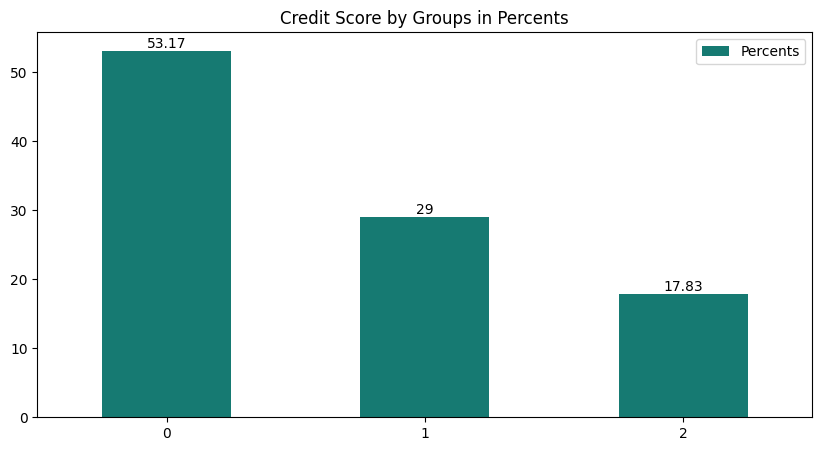

In [8]:
ax = data.Credit_Score.value_counts(normalize=True).mul(100).round(2).reset_index( name='Percents').plot(kind='bar', y='Percents', \
                                                                                  rot='horizontal', figsize=(10, 5), title='Credit Score by Groups in Percents')
ax.bar_label(ax.containers[0])

## Other Variables

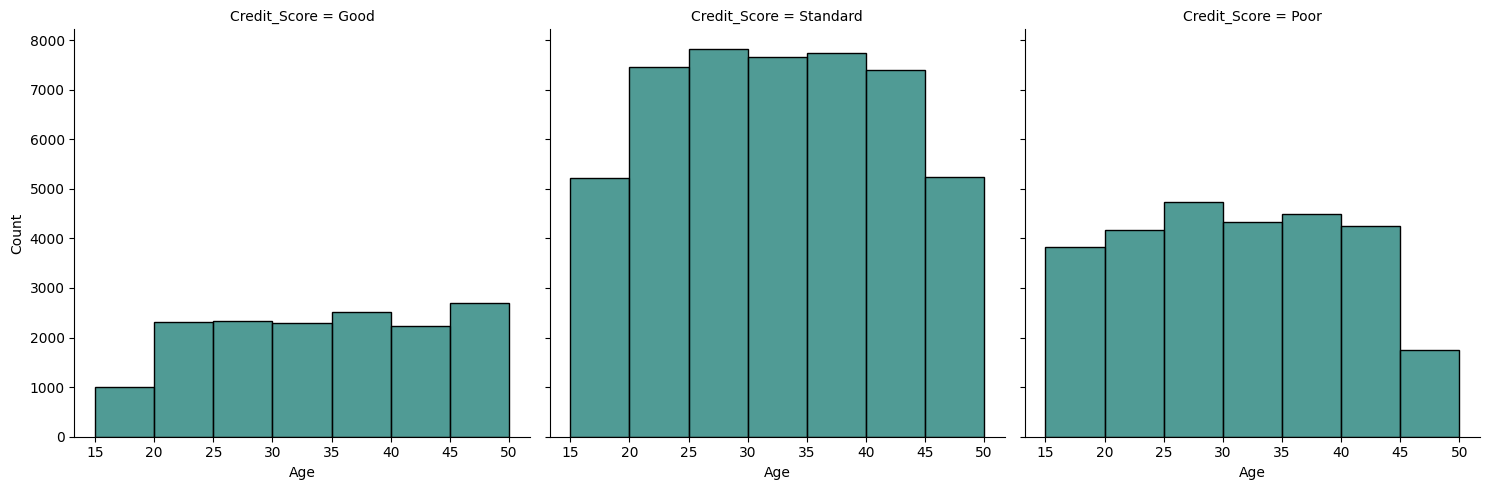

In [9]:
sns.displot(data, x="Age", col="Credit_Score", bins=[15, 20, 25, 30, 35, 40, 45, 50])


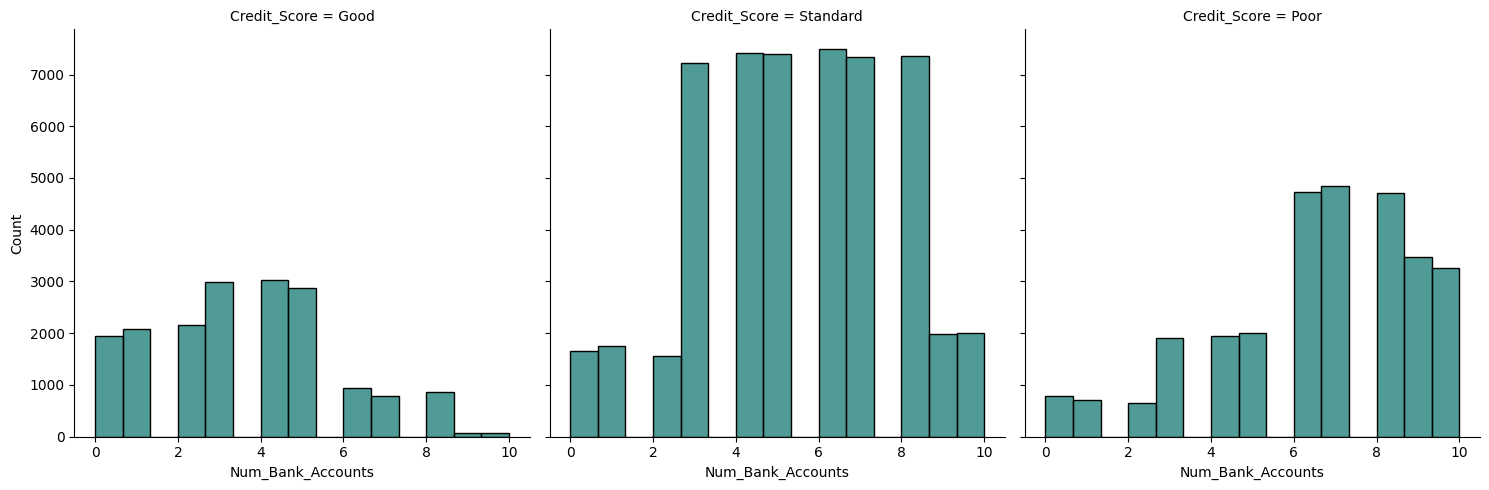

In [10]:
sns.displot(data, x='Num_Bank_Accounts', col='Credit_Score',bins = 15)

<Axes: xlabel='Num_of_Loan', ylabel='Count'>

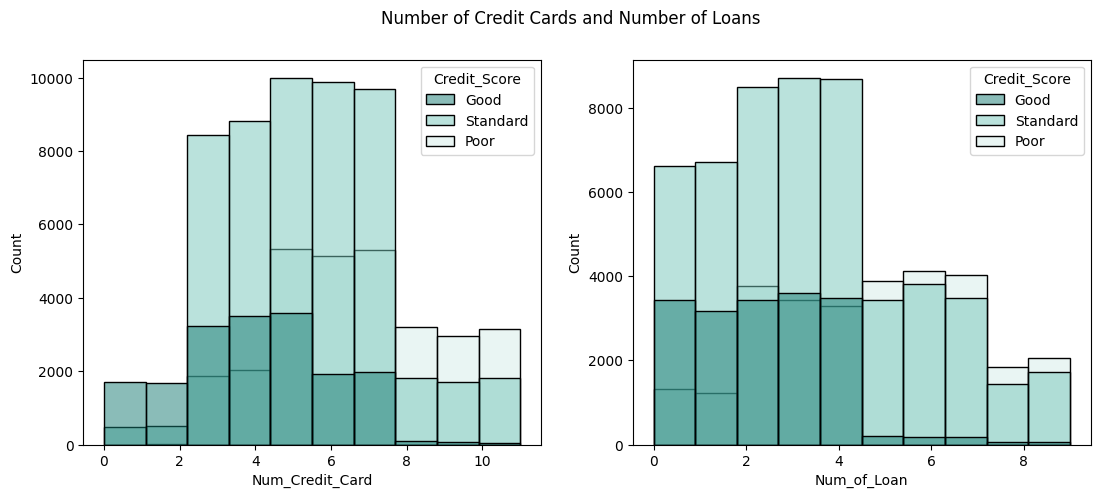

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), edgecolor = (0.0, 0.0, 0.0, 0.0))
fig.suptitle("Number of Credit Cards and Number of Loans")
sns.histplot(data, x='Num_Credit_Card', hue='Credit_Score', ax=ax1, bins=10)
sns.histplot(data, x='Num_of_Loan', hue='Credit_Score', ax=ax2, bins=10)


<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Count'>

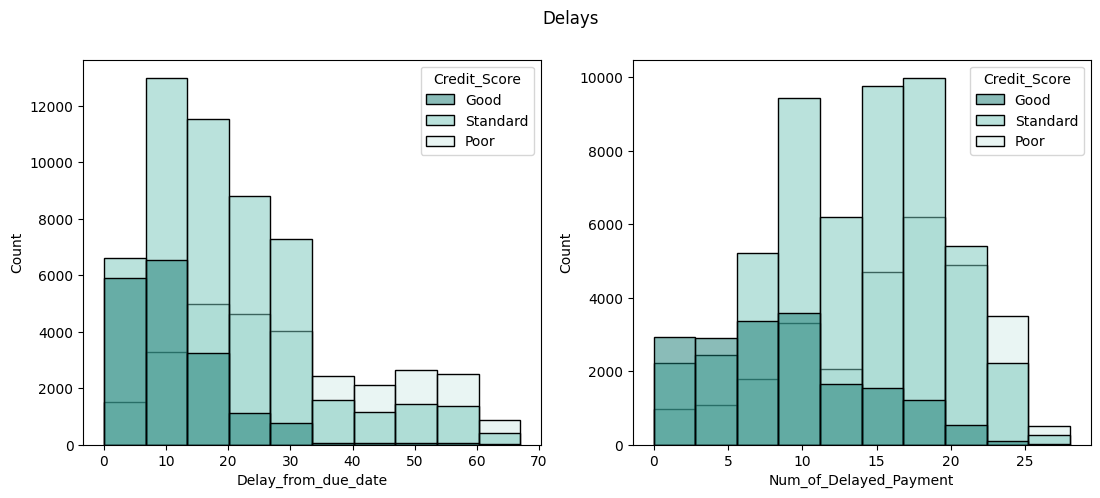

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle("Delays")
sns.histplot(data, x='Delay_from_due_date', hue='Credit_Score', ax=ax1, bins=10)
sns.histplot(data, x='Num_of_Delayed_Payment', hue='Credit_Score', ax=ax2, bins=10)

In [13]:
print(f"Number of rows where values of \"Credit_Mix\" and \"Credit_Score\" are same {(data.Credit_Mix == data.Credit_Score).sum()}")
print(f"Which is {(data.Credit_Mix == data.Credit_Score).sum() / data.shape[0] * 100:.1f}%")

Number of rows where values of "Credit_Mix" and "Credit_Score" are same 62479
Which is 62.5%


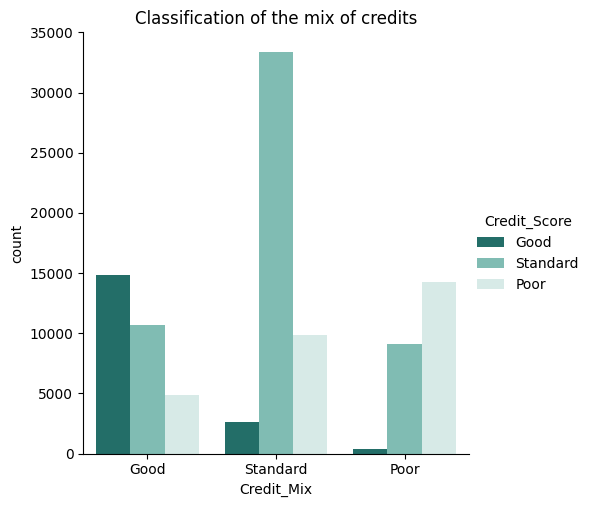

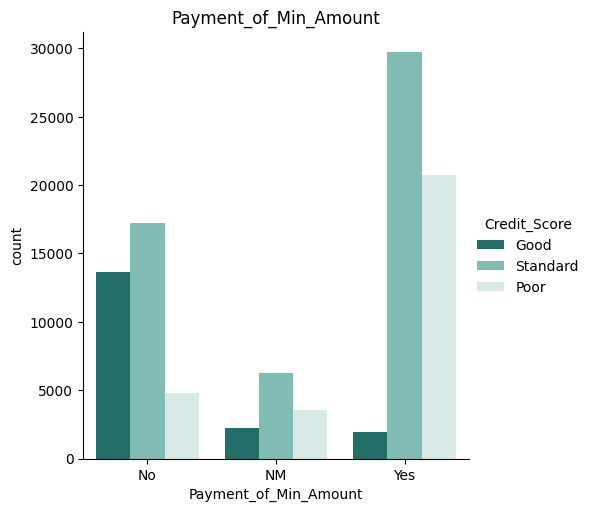

In [14]:
sns.catplot(data=data, x="Credit_Mix", hue='Credit_Score',  kind="count").set(title='Classification of the mix of credits')
sns.catplot(data=data, x="Payment_of_Min_Amount", hue='Credit_Score',  kind="count").set(title='Payment_of_Min_Amount')

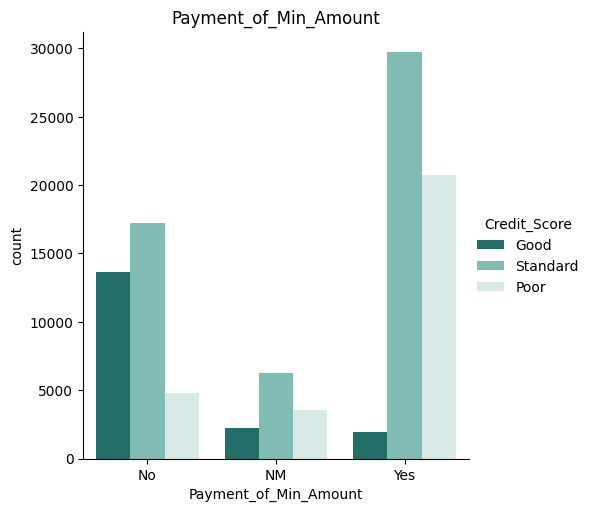

In [15]:
sns.catplot(data=data, x="Payment_of_Min_Amount", hue='Credit_Score',  kind="count").set(title='Payment_of_Min_Amount')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'High_spent_Medium_value_payments'),
  Text(1, 0, 'High_spent_Large_value_payments'),
  Text(2, 0, 'High_spent_Small_value_payments'),
  Text(3, 0, 'Low_spent_Large_value_payments'),
  Text(4, 0, 'Low_spent_Small_value_payments'),
  Text(5, 0, 'Low_spent_Medium_value_payments')])

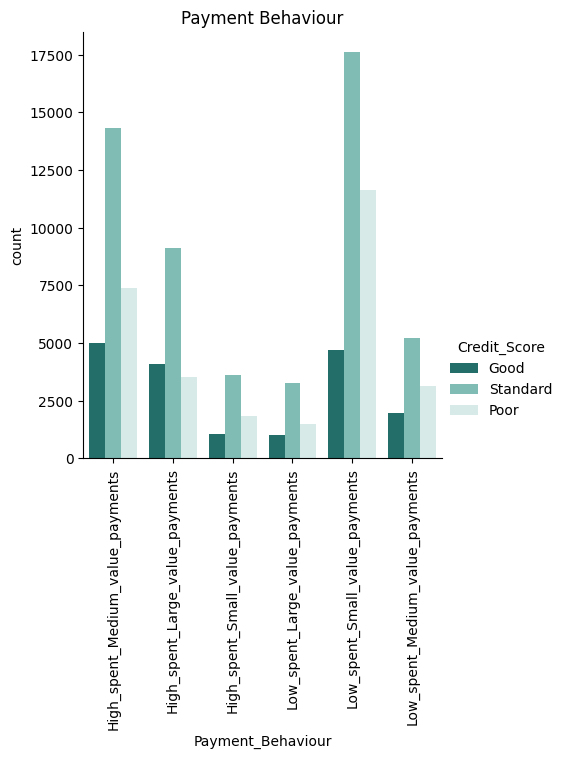

In [16]:
sns.catplot(data=data, x="Payment_Behaviour", hue='Credit_Score',  kind="count").set(title='Payment Behaviour')
plt.xticks(rotation=90)

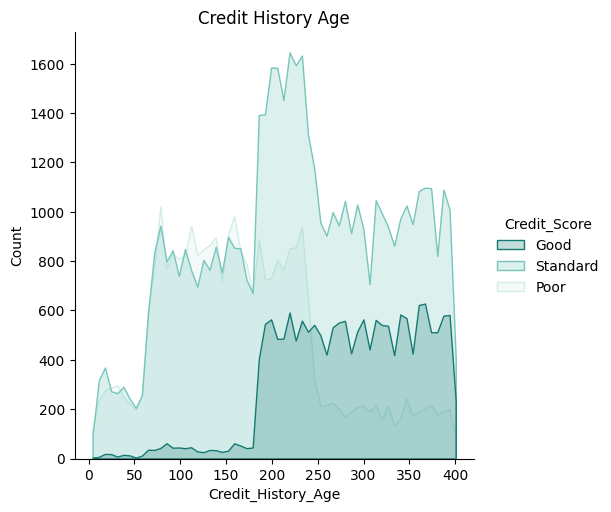

In [17]:
sns.displot(data=data, x="Credit_History_Age", hue='Credit_Score',element="poly").set(title='Credit History Age')

[Text(0.5, 1.0, 'Interest Rate')]

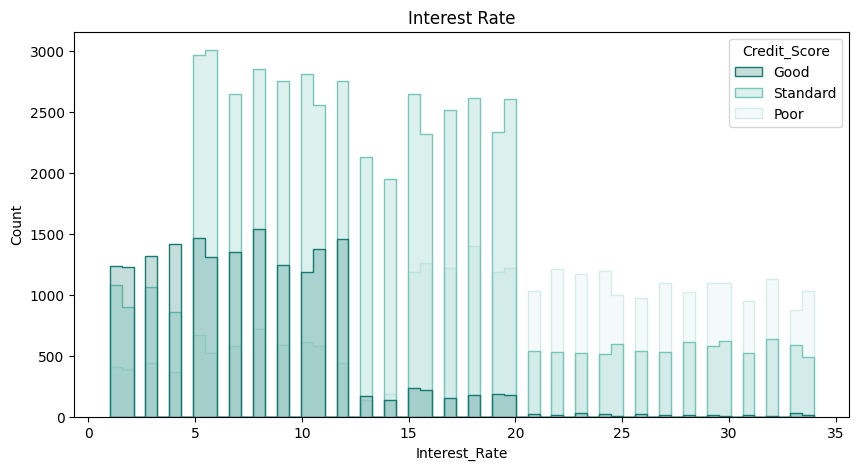

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=data, x="Interest_Rate", hue='Credit_Score', element="step").set(title='Interest Rate')

<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

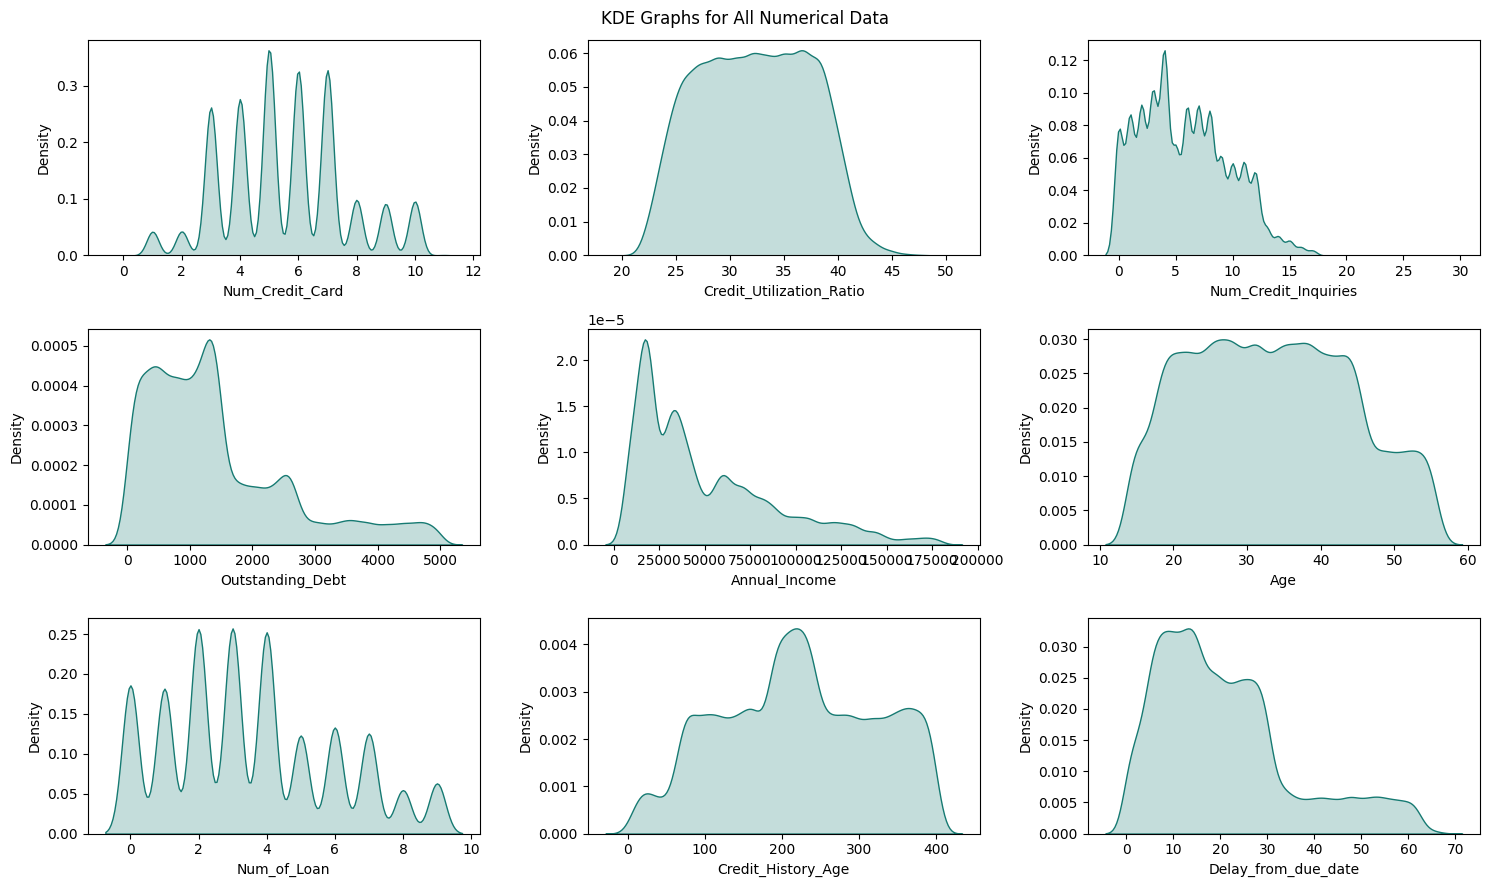

In [19]:
num_data = list(set(data.columns) - set(['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', "Credit_Score"]))
fig, axs = plt.subplots(3, 3, tight_layout=True, figsize=(15, 9))
fig.suptitle("KDE Graphs for All Numerical Data")
sns.kdeplot(data=data, x=num_data[0], ax=axs[0, 0], fill=True)
sns.kdeplot(data=data, x=num_data[1], ax=axs[0, 1], fill=True)
sns.kdeplot(data=data, x=num_data[2], ax=axs[0, 2], fill=True)
sns.kdeplot(data=data, x=num_data[3], ax=axs[1, 0], fill=True)
sns.kdeplot(data=data, x=num_data[4], ax=axs[1, 1], fill=True)
sns.kdeplot(data=data, x=num_data[5], ax=axs[1, 2], fill=True)
sns.kdeplot(data=data, x=num_data[6], ax=axs[2, 0], fill=True)
sns.kdeplot(data=data, x=num_data[7], ax=axs[2, 1], fill=True)
sns.kdeplot(data=data, x=num_data[8], ax=axs[2, 2], fill=True)

***42. How to choose the correct DPI and figure size in Matplotlib***

<Axes: xlabel='Changed_Credit_Limit', ylabel='Density'>

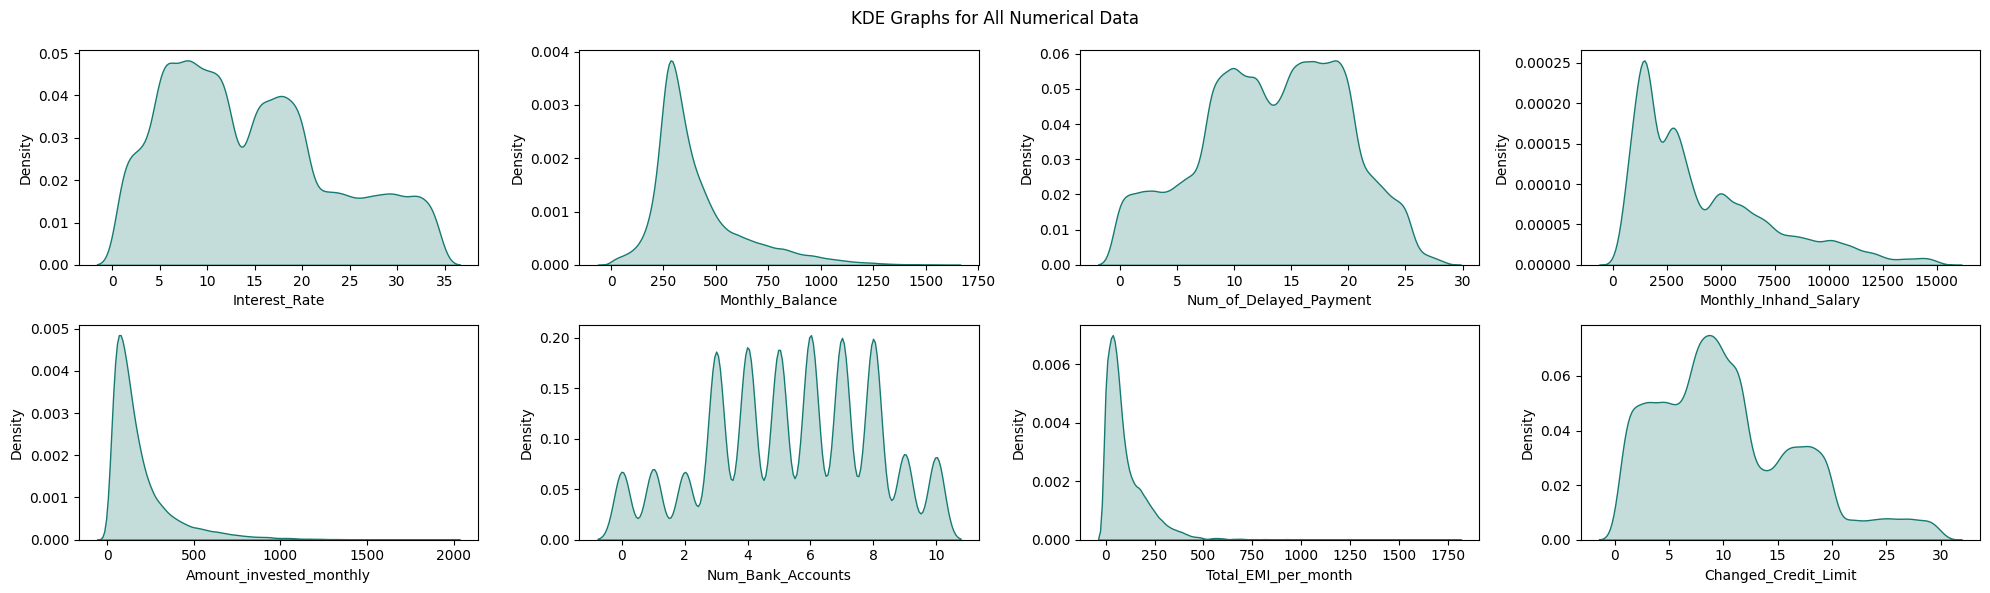

In [20]:
fig, axs = plt.subplots(2, 4, tight_layout=True, figsize=(20, 6), dpi=100)
fig.suptitle("KDE Graphs for All Numerical Data")
sns.kdeplot(data=data, x=num_data[9], ax=axs[0, 0], fill=True)
sns.kdeplot(data=data, x=num_data[10], ax=axs[0, 1], fill=True)
sns.kdeplot(data=data, x=num_data[11], ax=axs[0, 2], fill=True)
sns.kdeplot(data=data, x=num_data[12], ax=axs[0, 3], fill=True)
sns.kdeplot(data=data, x=num_data[13], ax=axs[1, 0], fill=True)
sns.kdeplot(data=data, x=num_data[14], ax=axs[1, 1], fill=True)
sns.kdeplot(data=data, x=num_data[15], ax=axs[1, 2], fill=True)
sns.kdeplot(data=data, x=num_data[16], ax=axs[1, 3], fill=True)

***54. Mapping any crazy distribution to normal with QuantileTransformer***

In [21]:
qt = QuantileTransformer(output_distribution='normal')
changed_data = data[num_data]
for col_name in changed_data.columns:
  changed_data[col_name] = qt.fit_transform(changed_data[col_name].to_numpy().reshape(-1, 1))

<ipython-input-21-9c6a48e907e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_data[col_name] = qt.fit_transform(changed_data[col_name].to_numpy().reshape(-1, 1))
<ipython-input-21-9c6a48e907e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_data[col_name] = qt.fit_transform(changed_data[col_name].to_numpy().reshape(-1, 1))
<ipython-input-21-9c6a48e907e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

<Axes: xlabel='Credit_History_Age', ylabel='Density'>

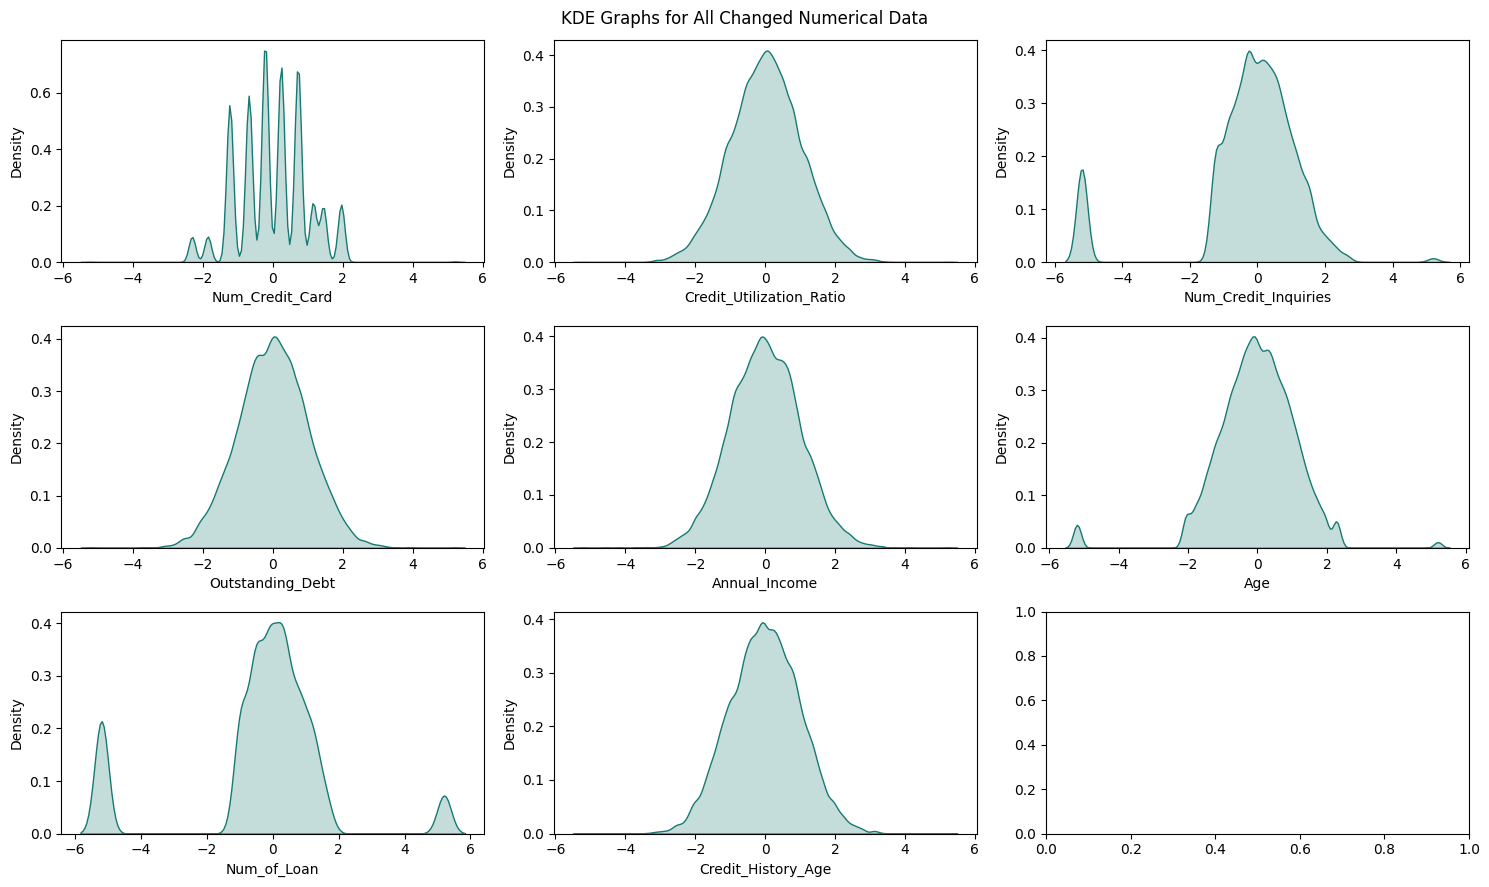

In [22]:
fig, axs = plt.subplots(3, 3, tight_layout=True, figsize=(15, 9))
fig.suptitle("KDE Graphs for All Changed Numerical Data")
sns.kdeplot(data=changed_data, x=num_data[0], ax=axs[0, 0], fill=True)
sns.kdeplot(data=changed_data, x=num_data[1], ax=axs[0, 1], fill=True)
sns.kdeplot(data=changed_data, x=num_data[2], ax=axs[0, 2], fill=True)
sns.kdeplot(data=changed_data, x=num_data[3], ax=axs[1, 0], fill=True)
sns.kdeplot(data=changed_data, x=num_data[4], ax=axs[1, 1], fill=True)
sns.kdeplot(data=changed_data, x=num_data[5], ax=axs[1, 2], fill=True)
sns.kdeplot(data=changed_data, x=num_data[6], ax=axs[2, 0], fill=True)
sns.kdeplot(data=changed_data, x=num_data[7], ax=axs[2, 1], fill=True)

<Axes: xlabel='Changed_Credit_Limit', ylabel='Density'>

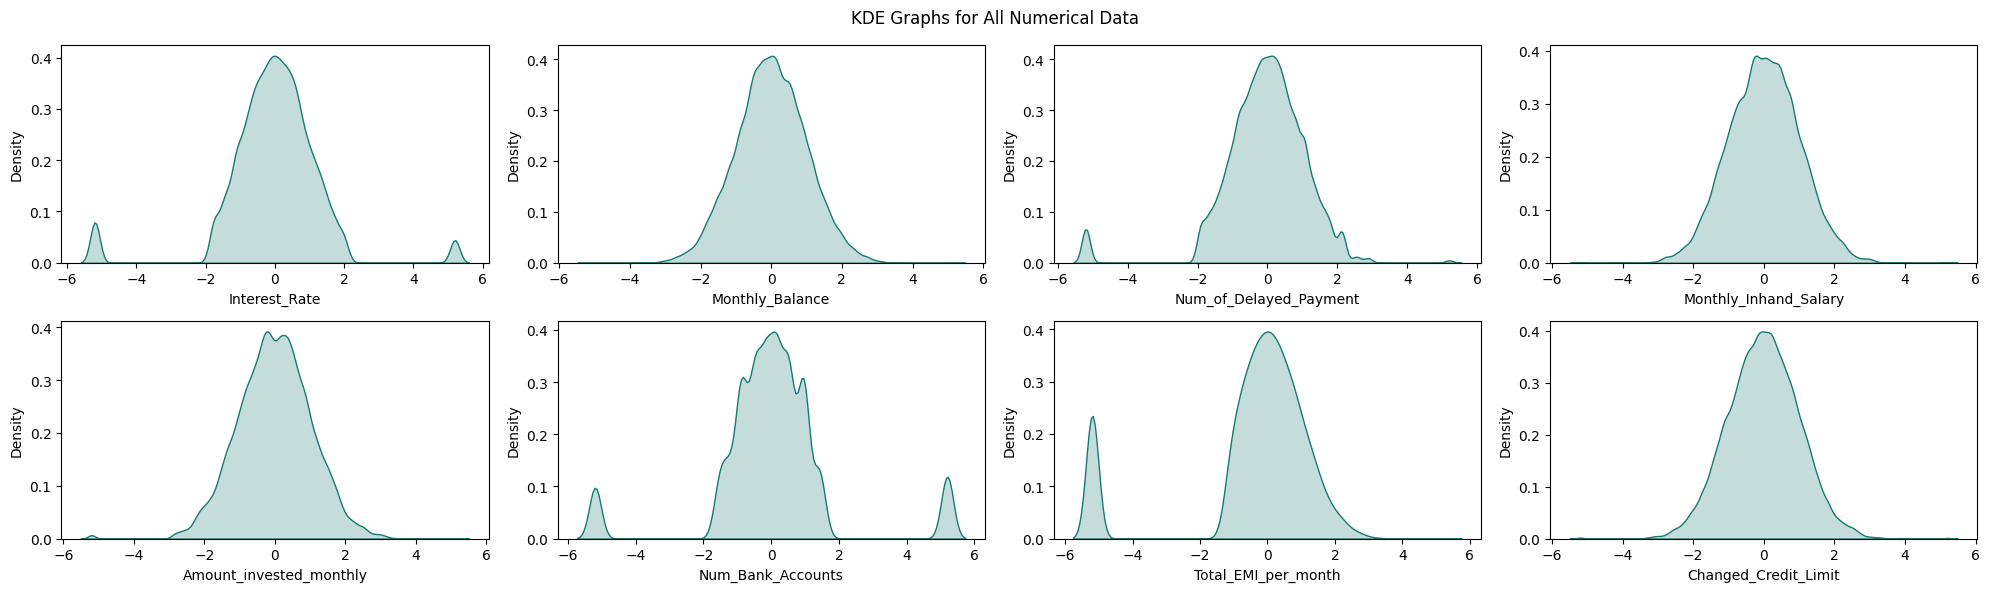

In [23]:
fig, axs = plt.subplots(2, 4, tight_layout=True, figsize=(20, 6), dpi=100)
fig.suptitle("KDE Graphs for All Numerical Data")
sns.kdeplot(data=changed_data, x=num_data[9], ax=axs[0, 0], fill=True)
sns.kdeplot(data=changed_data, x=num_data[10], ax=axs[0, 1], fill=True)
sns.kdeplot(data=changed_data, x=num_data[11], ax=axs[0, 2], fill=True)
sns.kdeplot(data=changed_data, x=num_data[12], ax=axs[0, 3], fill=True)
sns.kdeplot(data=changed_data, x=num_data[13], ax=axs[1, 0], fill=True)
sns.kdeplot(data=changed_data, x=num_data[14], ax=axs[1, 1], fill=True)
sns.kdeplot(data=changed_data, x=num_data[15], ax=axs[1, 2], fill=True)
sns.kdeplot(data=changed_data, x=num_data[16], ax=axs[1, 3], fill=True)

## Corr

<Axes: >

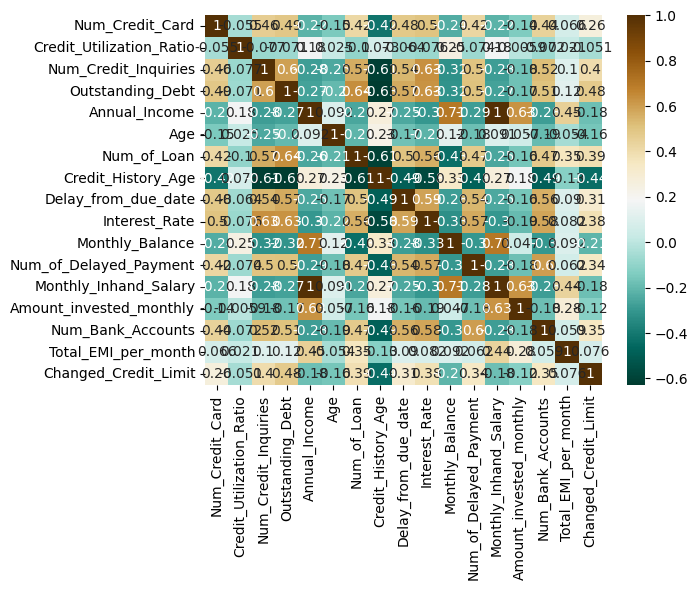

In [24]:
num_df = data[num_data]
sns.heatmap(num_df.corr(), cmap = 'BrBG_r', annot=True)

"Delay_from_due_day' column has many intersection with a high correlation

----

'Anual_Income' and 'Monthly_Inhans_Salary' have corr = 1, so 'Monthly_Inhans_Salary' will be deleted

In [25]:
data.drop('Monthly_Inhand_Salary', axis=1, inplace=True)

# Not Done
28. Pandas explode
31. Chaining multiple Pandas functions with Pandas pipe


***93. First swiss army knife of Matplotlib***

This is really helpful function:) I solve problem with very big graph

plt.getp(fig)

##To DO


93. First swiss army knife of Matplotlib
94. Second swiss army knife of Matplotlib

# Data Preporation

 ## Outliers Search

 ***88. Using z-scores for outlier detection is paradoxical***

In [26]:
def find_outliers(col_name):
  q1 = np.percentile(data[col_name].sort_values(), 25)
  q3 = np.percentile(data[col_name].sort_values(), 75)
  IQR = q3 - q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR
  outliers = [j for j in data[col_name] if j > upper or j < lower]
  ans = data[(data[col_name] > upper) | (data[col_name] < lower)].index

  return lower, upper

def clip_data(data):
  for col_name in data.columns:
    if data[col_name].dtypes == 'float64':
      lower, upper = find_outliers(col_name)
      data[col_name] = np.clip(data[col_name], lower, upper)
      print(f"{col_name}: {lower:.2f}, {upper:.2f}")

clip_data(data)

Delay_from_due_date: -17.00, 55.00
Num_of_Delayed_Payment: -4.50, 31.50
Num_Credit_Inquiries: -4.50, 15.50
Credit_Utilization_Ratio: 15.39, 49.16
Credit_History_Age: -93.00, 539.00
Amount_invested_monthly: -167.21, 475.25
Monthly_Balance: -32.06, 774.29
Age: -3.00, 69.00
Annual_Income: -59175.90, 150195.78
Num_Bank_Accounts: -3.00, 13.00
Num_Credit_Card: -0.50, 11.50
Interest_Rate: -12.50, 39.50
Num_of_Loan: -2.50, 9.50
Changed_Credit_Limit: -8.27, 28.45
Outstanding_Debt: -1507.10, 4021.38
Total_EMI_per_month: -145.74, 320.38




---



## Change Categoracal to Ordinal

In [27]:
data_categorical = data[:]
cat_data_col = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', "Credit_Score"]
for col in cat_data_col:
  data_categorical[col] = data_categorical[col].astype('category')

data.Payment_of_Min_Amount = data.Payment_of_Min_Amount.replace({'Yes': 2, 'NM': 1, 'No': 0})
data.Credit_Mix = data.Credit_Mix.replace({'Poor': 0, 'Standard': 1, 'Good': 2})
data.Payment_Behaviour = data.Payment_Behaviour.replace({'High_spent_Small_value_payments':0, 'Low_spent_Large_value_payments':1, 'Low_spent_Medium_value_payments':2, 'Low_spent_Small_value_payments':3, 'High_spent_Medium_value_payments':4, 'High_spent_Large_value_payments':5})
data.Credit_Score = data.Credit_Score.replace({'Poor': 0, 'Standard': 1, 'Good': 2})
data_categorical.Credit_Score = data_categorical.Credit_Score.replace({'Poor': 0, 'Standard': 1, 'Good': 2})

# Train Model Pipeline

In [28]:
y = data['Credit_Score']
data.drop('Credit_Score', axis=1, inplace=True)
data_categorical.drop('Credit_Score', axis=1, inplace=True)
data_train, hold_out_data, y_train, y_holdout = train_test_split(data, y, train_size=0.1, random_state=rng, stratify=y.tolist())
cat_data_train, cat_hold_out, y_cat_train, y_cat_holdout = train_test_split(data_categorical, y, train_size=0.1, random_state=rng, stratify=y.tolist())

In [29]:
class DummyModel():

  """ It's a joke model, I think this column is a data leak and I'd delete it"""

  def __init__(self, answer_column='Credit_Mix'):
    self.answer_column = answer_column

  def fit(self, X, y):
    assert self.answer_column in X.columns, 'Impossible to use this model'

  def predict(self, data):
    return data[self.answer_column]



In [30]:
dummy = DummyModel()
d_tree = DecisionTreeClassifier(class_weight='balanced', random_state=rng, max_depth=4)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=rng)
xgboost = xgb.XGBClassifier()
indexes = ["Dummy Model", "Decision Tree", "Random Forest", "XGBoost"]
scores = {"Accuracy": [], 'F1': []}
models = [dummy, d_tree, random_forest, xgboost]

***14. Get all scorer’s names in Sklearn***

In [31]:
scores = list(metrics.SCORERS.keys())
scores[:10]

['explained_variance',
 'r2',
 'max_error',
 'matthews_corrcoef',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error']

***7. The difference between micro, macro, and weighted averages***

***64. Shuffle CV***
But Stratified

In [32]:
def train_check_models(df, target):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng)
  scores = {'Accuracy':[], 'F1':[]}
  for model, name in zip(models, indexes):
    acc = 0
    f1 = 0
    for train_index, test_index in skf.split(df, target):

      X, y = df.iloc[train_index], target.iloc[train_index]
      X_test, y_test = df.iloc[test_index], target.iloc[test_index]
      model.fit(X, y)
      pred = model.predict(X_test)
      acc += accuracy_score(y_test, pred)
      f1 += f1_score(y_true=y_test, y_pred=pred, average='weighted')
    scores['Accuracy'].append(acc / 5)
    scores['F1'].append(f1 / 5)

  return scores
res_scores = train_check_models(data_train, y_train)

In [33]:
results = pd.DataFrame(res_scores, indexes)
results

Accuracy     F1
Dummy Model       0.618  0.618
Decision Tree     0.660  0.660
Random Forest     0.721  0.720
XGBoost           0.702  0.701

***11. Enabling categorical data support in XGBoost***

***13. XGBoost builtin-in encoder vs. OneHotEncoder***

In [34]:
cat_xgb = xgb.XGBClassifier(enable_categorical=True, random_state=rng)
indexes.append("Catigoracal XGBoost")
models.append(cat_xgb)
cv_result = cross_validate(cat_xgb, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["XGBoost with Categorical Data"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [35]:
results

Accuracy     F1
Dummy Model                       0.618  0.618
Decision Tree                     0.660  0.660
Random Forest                     0.721  0.720
XGBoost                           0.702  0.701
XGBoost with Categorical Data     0.713  0.713

***41. HTML representation of an Sklearn pipeline***

In [36]:
cat_data_col = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour']
num_data_col = list(set(data_categorical.columns) - set(cat_data_col))
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_data_col),
        ("cat", OneHotEncoder(), cat_data_col),
    ],
    verbose_feature_names_out=False,
)
pipe = make_pipeline(preprocessor, LogisticRegression(class_weight='balanced', max_iter=300, random_state=rng))
pipe.fit(cat_data_train, y_cat_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Num_Credit_Card',
                                                   'Credit_Utilization_Ratio',
                                                   'Num_Credit_Inquiries',
                                                   'Outstanding_Debt',
                                                   'Annual_Income', 'Age',
                                                   'Num_of_Loan',
                                                   'Credit_History_Age',
                                                   'Delay_from_due_date',
                                                   'Interest_Rate',
                                                   'Monthly_Balance',
                                                   'Num_of_Delayed_Payment',
                                                   'Amount_invested_monthly',
                                                   'Num_Bank_Accounts',
                                                   'Total_EMI_per_month',
                                                   'Changed_Credit_Limit']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Payment_of_Min_Amount',
                                                   'Credit_Mix',
                                                   'Payment_Behaviour'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=300,
                                    random_state=RandomState(MT19937) at 0x79D1A6D64E40))])

In [37]:
indexes.append("Logistic Regression")
models.append(pipe)
cv_result = cross_validate(pipe, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["Logistic Regression"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [38]:
results

Accuracy     F1
Dummy Model                       0.618  0.618
Decision Tree                     0.660  0.660
Random Forest                     0.721  0.720
XGBoost                           0.702  0.701
XGBoost with Categorical Data     0.713  0.713
Logistic Regression               0.667  0.671

In [39]:
preprocessor2 = ColumnTransformer(
    [
        ("num", QuantileTransformer(output_distribution='normal'), num_data_col),
        ("cat", OneHotEncoder(), cat_data_col),
    ],
    verbose_feature_names_out=False,
)
pipe2 = make_pipeline(preprocessor2, LogisticRegression(class_weight='balanced',max_iter=300, random_state=rng))
pipe2.fit(cat_data_train, y_cat_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['Num_Credit_Card',
                                                   'Credit_Utilization_Ratio',
                                                   'Num_Credit_Inquiries',
                                                   'Outstanding_Debt',
                                                   'Annual_Income', 'Age',
                                                   'Num_of_Loan',
                                                   'Credit_History_Age',
                                                   'Delay_from_due_date',
                                                   'Interest_Rate',
                                                   'Monthly_Balance',
                                                   'Num_of_Delayed_Payment',
                                                   'Amount_invested_monthly',
                                                   'Num_Bank_Accounts',
                                                   'Total_EMI_per_month',
                                                   'Changed_Credit_Limit']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Payment_of_Min_Amount',
                                                   'Credit_Mix',
                                                   'Payment_Behaviour'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=300,
                                    random_state=RandomState(MT19937) at 0x79D1A6D64E40))])

In [40]:
indexes.append("Logistic Regression with Quantile Transformer")
models.append(pipe2)
cv_result = cross_validate(pipe2, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["Logistic Regression with Quantile Transformer"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [41]:
results

Accuracy     F1
Dummy Model                                       0.618  0.618
Decision Tree                                     0.660  0.660
Random Forest                                     0.721  0.720
XGBoost                                           0.702  0.701
XGBoost with Categorical Data                     0.713  0.713
Logistic Regression                               0.667  0.671
Logistic Regression with Quantile Transformer     0.660  0.665

***76. Voting classifier/regressor***


In [42]:
estimators = [
    ("decision_tree", d_tree),
    ('random_forest',random_forest),
    ('xgboost', xgboost)
]
esemble = VotingClassifier(estimators=estimators, voting='soft')
indexes.append("Voting Classifier")
models.append(esemble)
cv_result = cross_validate(esemble, data_train, y_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["Voting Classifier"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [43]:
# estimators2 = [
#     ('logistic_regression', pipe),
#     ('logistic_regression_2', pipe2),
#     ('cat_xgb', cat_xgb)
# ]
# esemble2 = VotingClassifier(estimators=estimators2, voting='soft')
# indexes.append("Voting Classifier 2")
# models.append(esemble2)
# cv_result = cross_validate(esemble2, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
# results.loc["Voting Classifier 2"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

All models except XGBoost with disabled categorical

In [44]:
preprocessor_tree = ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), cat_data_col)],
        remainder="passthrough",
        verbose_feature_names_out=False,
    )

estimators3 = [
    ("decision_tree", make_pipeline(preprocessor_tree, d_tree)),
    ('random_forest', make_pipeline(preprocessor_tree, random_forest)),
    ('logistic_regression', pipe),
    ('cat_xgb', cat_xgb)
]
esemble3 = VotingClassifier(estimators=estimators3, voting='soft')
indexes.append("Categorical All Voting Classifier")
models.append(esemble3)
cv_result = cross_validate(esemble3, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["All Voting Classifier"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [45]:
results

Accuracy     F1
Dummy Model                                       0.618  0.618
Decision Tree                                     0.660  0.660
Random Forest                                     0.721  0.720
XGBoost                                           0.702  0.701
XGBoost with Categorical Data                     0.713  0.713
Logistic Regression                               0.667  0.671
Logistic Regression with Quantile Transformer     0.660  0.665
Voting Classifier                                 0.719  0.722
All Voting Classifier                             0.712  0.715

***77. Stacking ensemble/regressor***

In [90]:
estimators_stack = [
    ("decision_tree", make_pipeline(preprocessor_tree, d_tree)),
    ('random_forest', make_pipeline(preprocessor_tree, random_forest)),
    ('logistic_regression', pipe),
    ('cat_xgb', cat_xgb)
]
log_reg = LogisticRegression()
esemble_stack = StackingClassifier(estimators=estimators_stack, final_estimator=log_reg)
indexes.append("Categorical All Stacking Classifier")
models.append(esemble_stack)
cv_result = cross_validate(esemble_stack, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["All Stacking Classifier"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [91]:
results

Accuracy     F1
Dummy Model                                       0.618  0.618
Decision Tree                                     0.660  0.660
Random Forest                                     0.721  0.720
XGBoost                                           0.702  0.701
XGBoost with Categorical Data                     0.713  0.713
...                                                 ...    ...
Logistic Regression with Quantile Transformer     0.660  0.665
Voting Classifier                                 0.719  0.722
All Voting Classifier                             0.712  0.715
All Stacking Classifier                           0.732  0.732
All Stacking Classifier for Best Models           0.730  0.728

[11 rows x 2 columns]

In [48]:
estimators_stack_best = [
    ('random_forest', make_pipeline(preprocessor_tree, random_forest)),
    ('cat_xgb', cat_xgb)
]
log_reg = LogisticRegression()
esemble_stack_best = StackingClassifier(estimators=estimators_stack_best, final_estimator=log_reg)
indexes.append("Categerical All Stacking Classifier for Best Models")
models.append(esemble_stack_best)
cv_result = cross_validate(esemble_stack_best, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["All Stacking Classifier for Best Models"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]

In [49]:
results

Accuracy     F1
Dummy Model                                       0.618  0.618
Decision Tree                                     0.660  0.660
Random Forest                                     0.721  0.720
XGBoost                                           0.702  0.701
XGBoost with Categorical Data                     0.713  0.713
...                                                 ...    ...
Logistic Regression with Quantile Transformer     0.660  0.665
Voting Classifier                                 0.719  0.722
All Voting Classifier                             0.712  0.715
All Stacking Classifier                           0.731  0.731
All Stacking Classifier for Best Models           0.728  0.727

[11 rows x 2 columns]

# Hypoparameter tuning


##Usual Way

Where scorring has only one metric

In [50]:
# num_transformer = Pipeline(steps=[
#                                   ('scaler', StandardScaler())])
# preprocessor = ColumnTransformer(
#     [
#         ("num", num_transformer, num_data_col),
#         ("cat", OneHotEncoder(), cat_data_col),
#     ],
#     verbose_feature_names_out=False,
# )

# lr = LogisticRegression(class_weight='balanced', random_state=rng)

# parameters_grid_lin = {

#     'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'logisticregression__max_iter': [300, 500, 700],
#     'preprocessor__num__scaler':[StandardScaler(), QuantileTransformer(output_distribution='normal')]
# }

# pipe = Pipeline(steps=[('preprocessor', preprocessor), ('logisticregression', lr)])
# cv = StratifiedKFold(n_splits=5, shuffle=True)
# grid_cv_lin = GridSearchCV(pipe, parameters_grid_lin,
#                        scoring='accuracy', cv=5, verbose=0)
# grid_cv_lin.fit(cat_data_train, y_cat_train)

In [51]:
best_lr = LogisticRegression(class_weight='balanced', C=0.1, max_iter=300, penalty='l1', solver='liblinear', random_state=rng)
log_reg_best = Pipeline(steps=[('preprocessor', preprocessor), ('logisticregression', best_lr)])
models.append(log_reg_best)
indexes.append("Logistic Regression Best")
# print(grid_cv_lin.best_score_) # 0.6677665332666334
# print(grid_cv_lin.best_params_)

In [52]:
# params_grid_xgb = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5],
#         'n_estimators': [100, 300, 500, 700, 1000]
#         }
# grid_cv_xgb = GridSearchCV(cat_xgb , params_grid_xgb,
#                        scoring='accuracy', cv=5, verbose=0)
# grid_cv_xgb.fit(cat_data_train, y_cat_train)


In [53]:
best_xgb = xgb.XGBClassifier(colsample_bytree= 0.6, gamma=2, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0, enable_categorical=True)
models.append(best_xgb)
indexes.append("Categorical XGBoost Best")
# print(grid_cv_xgb.best_score_) # 0.7132846423211605
# print(grid_cv_xgb.best_params_)

In [54]:
# params_grid_rforest = {
#                       'random_forest__max_depth': [3, 5, 10, 12, None],
#                       'random_forest__min_samples_leaf': [2, 4, 6],
#                       'random_forest__min_samples_split': [2, 5, 10],
#                       'random_forest__n_estimators': [200, 400, 600]}
# pipe_rforest = Pipeline(steps=[('preprocessor', preprocessor_tree), ('random_forest', RandomForestClassifier(random_state=rng))])
# grid_cv_rforest = GridSearchCV(pipe_rforest, params_grid_rforest, scoring='accuracy', cv=5, verbose=0)
# grid_cv_rforest.fit(cat_data_train, y_cat_train)

In [55]:
best_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=rng)
best_rf_pipe = Pipeline(steps=[('preprocessor', preprocessor_tree), ('random_forest', best_rf)])
models.append(best_rf_pipe)
indexes.append("Categorical Random Forest Best")
# print(grid_cv_rforest.best_score_) #0.7334934967483742
# print(grid_cv_rforest.best_params_)

In [56]:
param_grid_dtree = {
                    'dtree__criterion': ["gini", "entropy", "log_loss"],
                    "dtree__max_depth": list(range(1, 11, 2)),
                    'dtree__min_samples_split': list(range(2, 10))
}
pipe_dtree = Pipeline(steps=[('preprocessor', preprocessor_tree), ('dtree', DecisionTreeClassifier(random_state=rng))])
grid_cv_dtree = GridSearchCV(pipe_dtree, param_grid_dtree, scoring='accuracy', cv=5)
grid_cv_dtree.fit(cat_data_train, y_cat_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Payment_of_Min_Amount',
                                                                          'Credit_Mix',
                                                                          'Payment_Behaviour'])],
                                                          verbose_feature_names_out=False)),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=RandomState(MT19937) at 0x79D1A6D64E40))]),
             param_grid={'dtree__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtree__max_depth': [1, 3, 5, 7, 9],
                         'dtree__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [57]:
best_dtree = DecisionTreeClassifier(class_weight='balanced', random_state=rng, max_depth=5, min_samples_split=2)
best_dtree_pipe = Pipeline(steps=[('preprocessor', preprocessor_tree), ('d_tree', best_dtree)])
models.append(best_dtree_pipe)
indexes.append("Categorical Decision Tree Best")
print(grid_cv_dtree.best_score_)
print(grid_cv_dtree.best_params_)

0.7058828914457228
{'dtree__criterion': 'gini', 'dtree__max_depth': 5, 'dtree__min_samples_split': 2}


In [58]:
estimators_stack_best_of_the_best = [
    ('random_forest', best_rf_pipe),
    ('cat_xgb', best_xgb),
    ('lr', log_reg_best),
    ('d_tree', best_dtree_pipe)
]
log_reg = LogisticRegression()
esemble_stack_best = StackingClassifier(estimators=estimators_stack_best, final_estimator=log_reg)
indexes.append("All Stacking Classifier for Best Models")
models.append(esemble_stack_best)
cv_result = cross_validate(esemble_stack_best, cat_data_train, y_cat_train, scoring=['accuracy', 'f1_weighted'], cv=5)
results.loc["All Stacking Classifier for Best Models"] = [cv_result['test_accuracy'].mean(), cv_result['test_f1_weighted'].mean()]
models.append(esemble_stack_best)
indexes.append("Categorical Stacking Best of the Best")

In [59]:
results

Accuracy     F1
Dummy Model                                       0.618  0.618
Decision Tree                                     0.660  0.660
Random Forest                                     0.721  0.720
XGBoost                                           0.702  0.701
XGBoost with Categorical Data                     0.713  0.713
...                                                 ...    ...
Logistic Regression with Quantile Transformer     0.660  0.665
Voting Classifier                                 0.719  0.722
All Voting Classifier                             0.712  0.715
All Stacking Classifier                           0.731  0.731
All Stacking Classifier for Best Models           0.730  0.728

[11 rows x 2 columns]

## New Way
***86. Hyperparameter tuning for multiple metrics with Optuna***

Optimize models for multipal metrics!

It also works 60 times faster (3 hours vs 3 minutes)

In [60]:
def objective_xgb(trial):

  max_depth = trial.suggest_int("max_depth", 3, 8, step=1)
  gamma = trial.suggest_float('gamma', 0.5, 5, step=0.5)
  subsample = trial.suggest_float('subsample', 0.6, 1.0, step=0.2)
  colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0, step=0.2)
  lr = trial.suggest_float('learning_rate', 0.05, 0.15, step=0.05)
  n_estimators = trial.suggest_int('n_estimators', 100, 900, step=200)

  xgb_cls = xgb.XGBClassifier(max_depth=max_depth,
                          gamma=gamma,
                          subsample=subsample,
                          colsample_bytree=colsample_bytree,
                          learning_rate=lr,
                          n_estimators=n_estimators,
                          random_state=rng,
                          enable_categorical=True,
                          )
  xgb_cls.fit(cat_data_train, y_cat_train,)
  preds = xgb_cls.predict(cat_hold_out)

  f1 = f1_score(y_cat_holdout, preds, average='weighted')
  accuracy = accuracy_score(y_cat_holdout, preds)
  return f1, accuracy

study = optuna.create_study(directions=['maximize', 'maximize'])

study.optimize(objective_xgb, n_trials=50, gc_after_trial=True)

[I 2024-01-15 20:50:56,196] A new study created in memory with name: no-name-42f19594-de00-4bf9-bceb-1f807c13fc07
[I 2024-01-15 20:50:56,849] Trial 0 finished with values: [0.715793521122831, 0.714463563203059] and parameters: {'max_depth': 7, 'gamma': 3.0, 'subsample': 0.8, 'colsample_bytree': 1.0, 'learning_rate': 0.15, 'n_estimators': 300}. 
[I 2024-01-15 20:50:57,673] Trial 1 finished with values: [0.7090300097069763, 0.7076386109999555] and parameters: {'max_depth': 3, 'gamma': 3.0, 'subsample': 0.6, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'n_estimators': 300}. 
[I 2024-01-15 20:51:01,077] Trial 2 finished with values: [0.719712741708347, 0.7196211818060557] and parameters: {'max_depth': 5, 'gamma': 1.0, 'subsample': 0.6, 'colsample_bytree': 0.6, 'learning_rate': 0.05, 'n_estimators': 900}. 
[I 2024-01-15 20:51:05,651] Trial 3 finished with values: [0.7116340234529586, 0.7106175803654795] and parameters: {'max_depth': 4, 'gamma': 1.0, 'subsample': 1.0, 'colsample_bytree': 0

In [61]:
study.best_trials

[FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.7226561576086048, 0.7218109466008625], datetime_start=datetime.datetime(2024, 1, 15, 20, 51, 22, 191204), datetime_complete=datetime.datetime(2024, 1, 15, 20, 51, 24, 82201), params={'max_depth': 7, 'gamma': 1.5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'n_estimators': 700}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=8, log=False, low=3, step=1), 'gamma': FloatDistribution(high=5.0, log=False, low=0.5, step=0.5), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=0.2), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=0.2), 'learning_rate': FloatDistribution(high=0.15, log=False, low=0.05, step=0.05), 'n_estimators': IntDistribution(high=900, log=False, low=100, step=200)}, trial_id=16, value=None),
 FrozenTrial(number=38, state=TrialState.COMPLETE, values=[0.7226423470938175, 0.721

In [62]:
print("The best value is 0.7242561135637755")
best_optuna = xgb.XGBClassifier(random_state=rng,
                          enable_categorical=True, max_depth= 8, gamma=0.5, subsample=1.0, colsample_bytree=0.6, learning_rate= 0.1, n_estimators=700)
models.append(best_optuna)
indexes.append("Categorical Best Optuna")


The best value is 0.7242561135637755


# Evaluate model

## All models

In [92]:
for name, model in zip(indexes, models):
    print(name)
    if name[:3] == 'Cat' or name[:3] == "Log":
      model.fit(cat_data_train, y_cat_train)
      print(classification_report(y_cat_holdout, model.predict(cat_hold_out)))
    else:
      model.fit(data_train, y_train)
      print(classification_report(y_holdout, model.predict(hold_out_data)))
    print('-'*60)

Dummy Model
              precision    recall  f1-score   support

           0       0.60      0.49      0.54     26089
           1       0.73      0.63      0.67     47834
           2       0.49      0.83      0.62     16041

    accuracy                           0.63     89964
   macro avg       0.61      0.65      0.61     89964
weighted avg       0.65      0.63      0.63     89964

------------------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     26089
           1       0.86      0.54      0.66     47834
           2       0.50      0.83      0.63     16041

    accuracy                           0.66     89964
   macro avg       0.66      0.72      0.66     89964
weighted avg       0.72      0.66      0.66     89964

------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.

## Confusion Matrix

***2. ConfusionMatrix display for better confusion matrix***

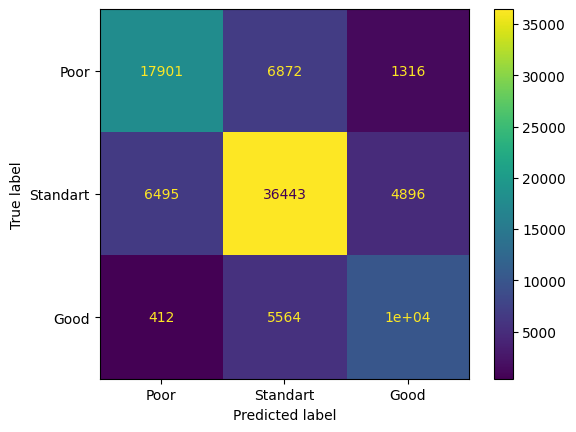

In [64]:
cat_xgb.fit(cat_data_train, y_cat_train)
ConfusionMatrixDisplay.from_estimator(
    cat_xgb,
    cat_hold_out,
    y_cat_holdout,
    display_labels = ["Poor", "Standart", "Good"]
)

# Research Model


17. Switch the APIs in XGBoost



***1. Permutation Importance with ELI5***

In [65]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgboost).fit(data, y)
eli5.show_weights(perm, feature_names=data.columns.tolist())

## Use Sklearn

***3. Text representation of a decision tree***

In [66]:
d_tree.fit(data, y)
text = sklearn.tree.export_text(d_tree)
print(text)

|--- feature_8 <= 1.50
|   |--- feature_17 <= 1266.57
|   |   |--- feature_18 <= 284.26
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_18 >  284.26
|   |   |   |--- feature_15 <= 3.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_15 >  3.50
|   |   |   |   |--- class: 1
|   |--- feature_17 >  1266.57
|   |   |--- feature_14 <= 14.50
|   |   |   |--- feature_17 <= 1522.61
|   |   |   |   |--- class: 1
|   |   |   |--- feature_17 >  1522.61
|   |   |   |   |--- class: 1
|   |   |--- feature_14 >  14.50
|   |   |   |--- feature_16 <= 14.84
|   |   |   |   |--- class: 0
|   |   |   |--- feature_16 >  14.84
|   |   |   |   |--- class: 0
|--- feature_8 >  1.50
|   |--- feature_0 <= 16.50
|   |   |--- feature_13 <= 2.50
|   |   |   |--- feature_11 <= 126021.22
|   |   |   |   |--- class: 2
|   |   |   |--- feature_11 >  126021.22
|   |   |   |   |--- class: 2
|   |   |--- feature_1

***5. Plotting decision trees in Sklearn***

In [88]:
fig, ax1 = plt.subplots(1, 1, figsize=(20, 5), dpi=500)
sklearn.tree.plot_tree(d_tree, feature_names=data.columns, ax=ax1, filled=True, fontsize=5)
plt.show()

[Sourse](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

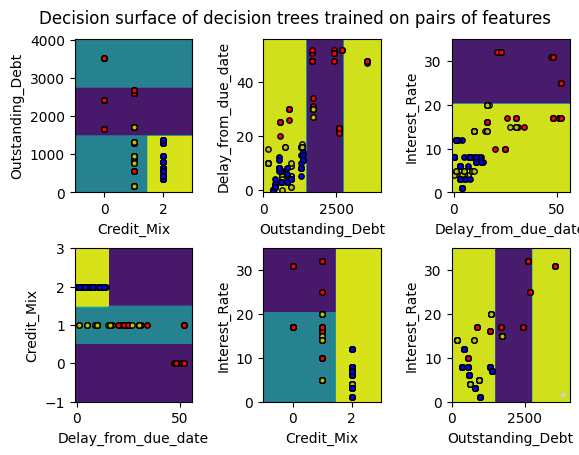

In [68]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([['Credit_Mix', 'Outstanding_Debt'], ['Outstanding_Debt', 'Delay_from_due_date'], ['Delay_from_due_date', 'Interest_Rate'], ['Delay_from_due_date', 'Credit_Mix'], ['Credit_Mix' ,'Interest_Rate'], ['Outstanding_Debt', 'Interest_Rate']]):
    # We only take the two corresponding features
    X = data.loc[:, pair]
    y = y

    # Train
    clf = DecisionTreeClassifier(max_depth=2).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        ax=ax,
        xlabel=pair[0],
        ylabel=pair[1],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X.iloc[idx].loc[:, pair[0]][:50],
            X.iloc[idx].loc[:, pair[1]][:50],
            c=color,
            # label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


***38. Mlextend — plot decision boundaries of classifiers***


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

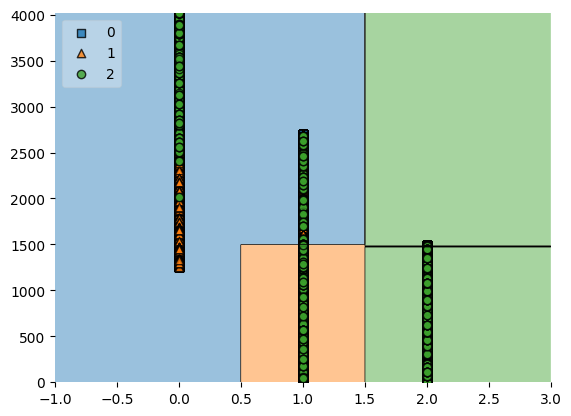

In [69]:
from mlxtend.plotting import plot_decision_regions
d_tree.fit(data.loc[:, ['Credit_Mix', 'Outstanding_Debt']], y)
plot_decision_regions(data.loc[:, ['Credit_Mix', 'Outstanding_Debt']].to_numpy(), y.to_numpy(), clf=d_tree, legend=2)

## Dtreeviz

***19. DTreeViz package to plot decision trees***

In [70]:
%config InlineBackend.figure_format = 'retina'
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00


In [71]:
d_tree.fit(data_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       random_state=RandomState(MT19937) at 0x79D1A6D64E40)

In [72]:
import warnings
warnings.filterwarnings('ignore')


### Tree structure visualizations

[Source](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb#scrollTo=s2BJ7ZbvkVhB)



In [ ]:
viz_model = dtreeviz.model(d_tree,
                           X_train=data_train, y_train=y_train,
                           feature_names=data_train.columns,
                           target_name='Credit_Score', class_names=[0, 1, 2])

viz_model.view(scale=0.8, orientation="LR")

### Prediction path explanations

***24. Print the prediction path of a sample***

For interpretation purposes, we often want to understand how a tree behaves for a specific instance. Let's pick a specific instance:

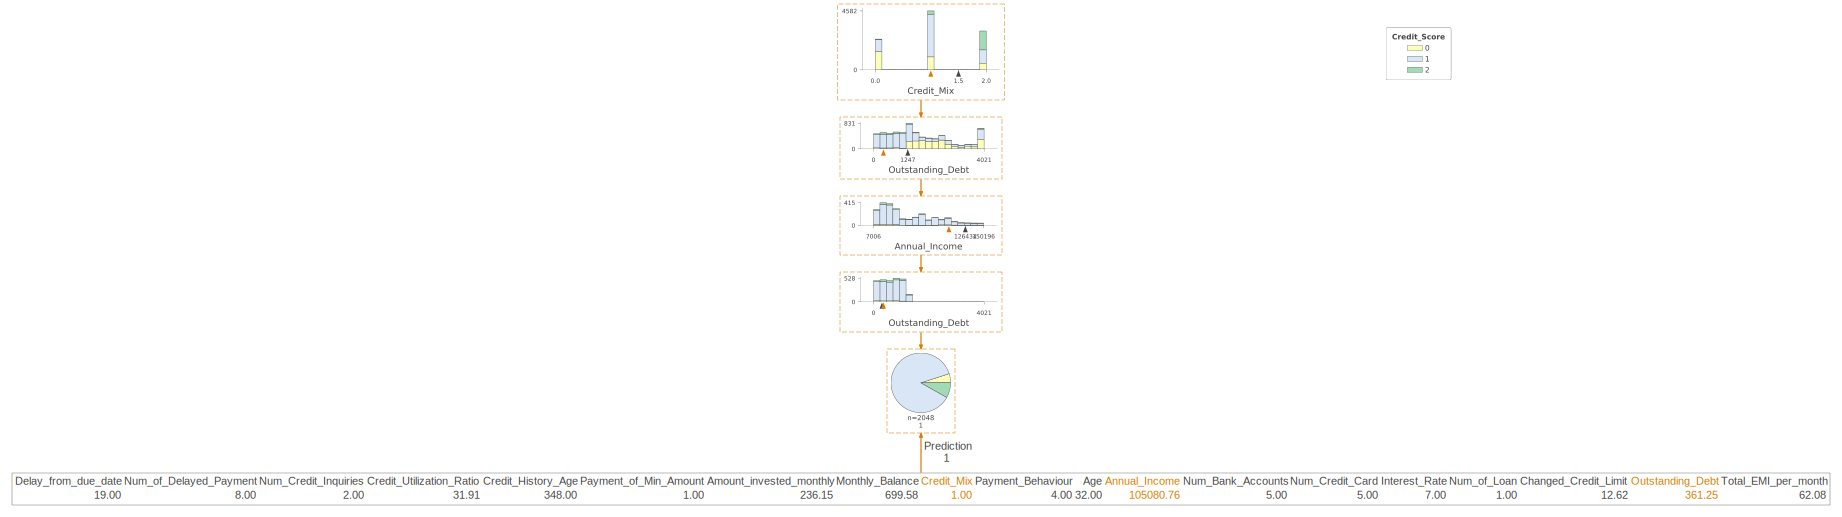

In [74]:
x = data_train.iloc[0]
viz_model.view(x=x, show_just_path=True)

In [75]:
print(viz_model.explain_prediction_path(x))
print(f"Predict {y_train.iloc[0]}")

Credit_Mix < 1.5
Annual_Income < 126433.88
308.05 <= Outstanding_Debt  < 1247.18

Predict 1


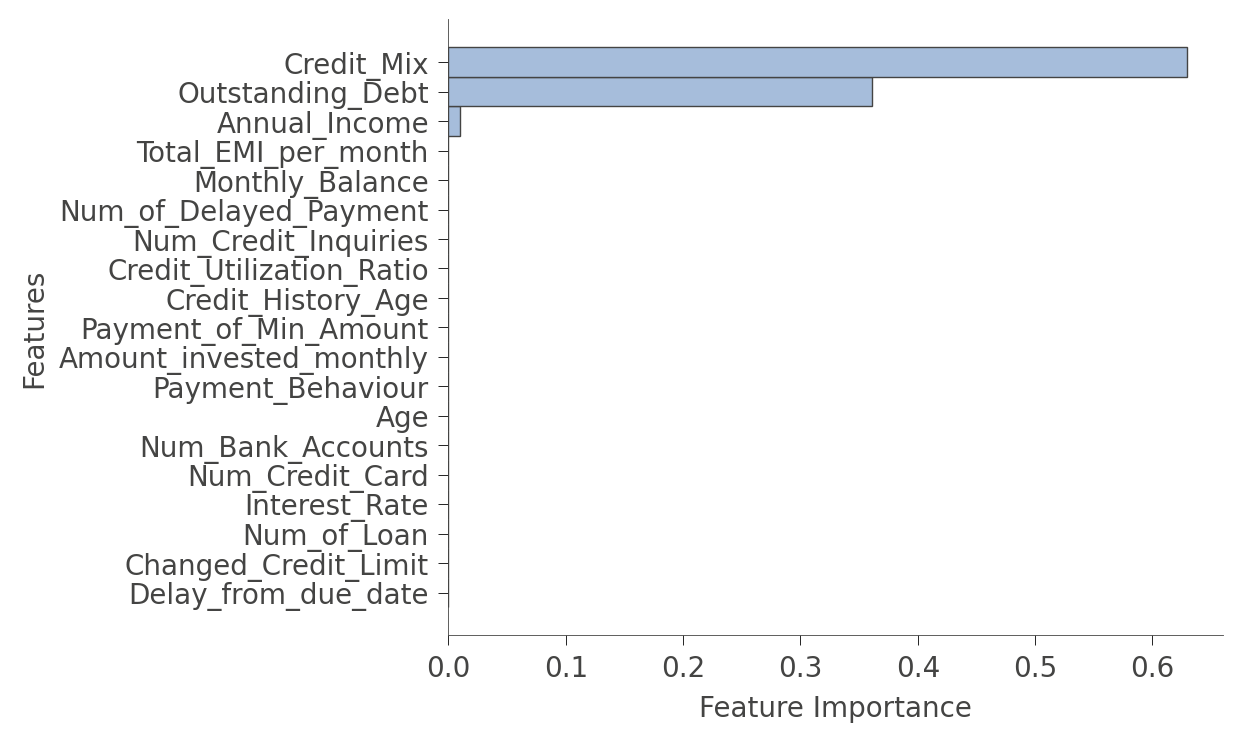

In [76]:
viz_model.instance_feature_importance(x, figsize=(5,4))